# Introduction to Matplotlib

**matplotlib** is probably the single most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. We are going to explore matplotlib in interactive mode covering most common cases.

# pyplot

... provides a convenient interface to the matplotlib object-oriented plotting library. It is modeled closely after **matlab**. Therefore, the majority of plotting commands in pyplot have **matlab** analogs with similar arguments. Important commands are explained with interactive examples.

# How to use it in a interactive notebook

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

# The simplest type of plot

Let's draw a *sine* versus a *cosine* function on the same plot.

In [2]:
import numpy as np

# numpy array with 256 values ranging between -pi and pi.
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)

cos = np.cos(x)
sin = np.sin(x)

<IPython.core.display.Javascript object>


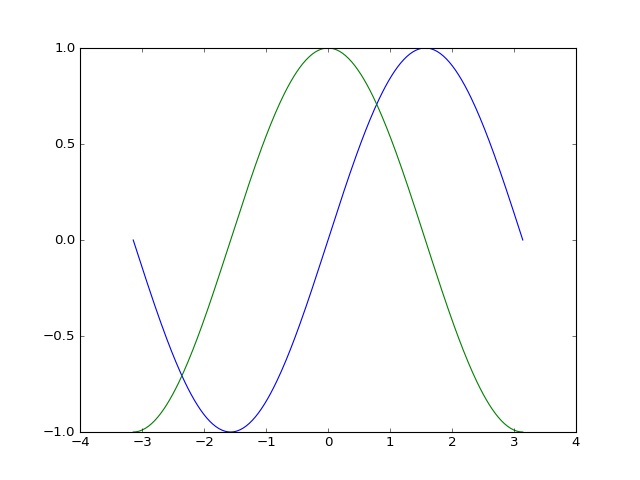

In [3]:
plt.plot(x, sin)
plt.plot(x, cos)
_ = plt.show() # to clean the output

# This is a quick and easy way to plot stuff but not necessarily the right way

# A quick anatomy of the matplolib "plot"

![](images/figure_axes_axis_labeled.png)

The **figure** is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and **figures** can contain multiple **axes**.

Most plotting ocurs on an **axes**. The **axes** is effectively the area that we plot data on and any **ticks/labels/etc** associated with it. Usually we'll set up an **axes** with a call to **subplot** (which places Axes on a regular grid), so in most cases, **axes** and **subplot** are synonymous.

Each **axes** has an **x-axis** and a **y-axis**. These contain the **ticks, tick locations, labels**, etc. We mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual **axis** part of things all that much. It's worth mentioning to explain where the term **axes** comes from.

# Creating our first figure ...

<IPython.core.display.Javascript object>


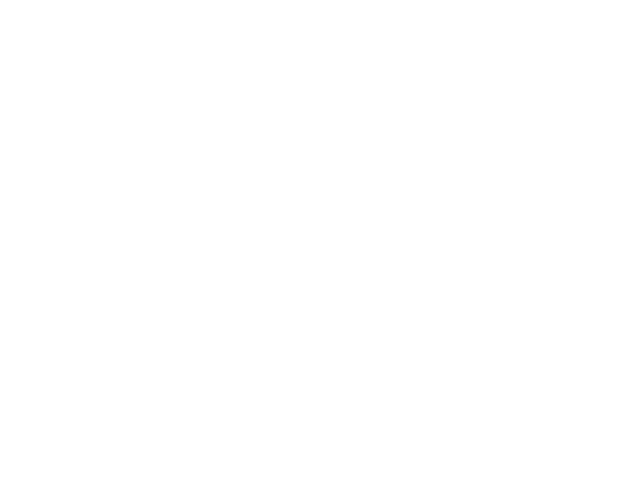

In [4]:
fig = plt.figure()

# Great, we have an empty figure

*NOTE*: if the figure does not display, please use the **.show()** method on **fig**: **fig.show()**. In the case you have a single plot, use **plt.show()**

## Using the *figsize* argument to control the figure size

**figsize** expects a tuple of (width, height) in inches.

... but we can control the aspect rate using the **.figaspect()** method

<IPython.core.display.Javascript object>


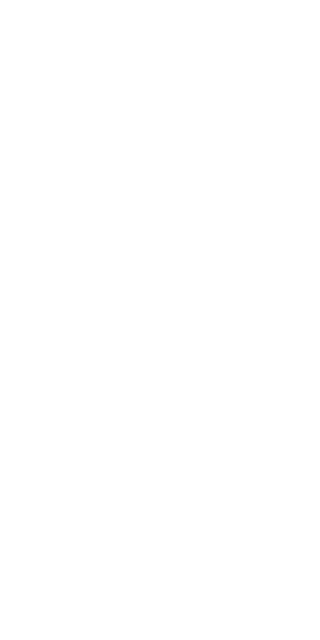

In [5]:
# the new figure will be two times as tall and as wide
w, h = plt.figaspect(2.0)

fig = plt.figure(figsize=(w, h))

## Axes

All plotting is done with respect to an **axes**. An **axes** is made up of **axis** objects and many other things. An **axes** object must belong to a **figure** (and only one figure). Most commands you will ever issue will be with respect to this **axes** object.

Typically, you'll set up a **figure**, and then add an **axes** to it.

You can use **fig.add_axes()**, but in most cases, you'll find that adding a **subplot** will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.)

<IPython.core.display.Javascript object>


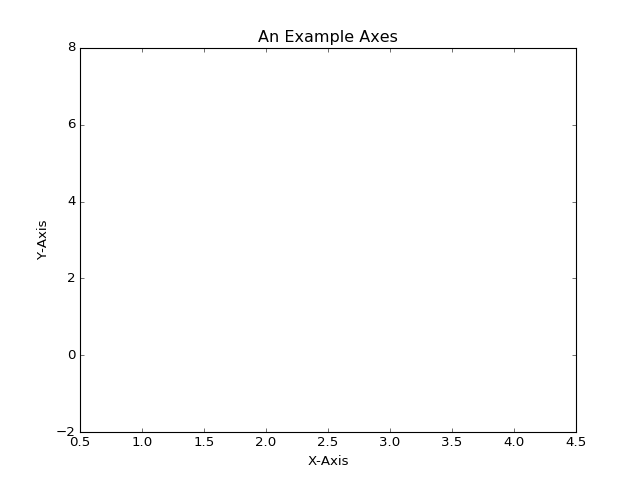

In [6]:
fig = plt.figure()

# 1row, 1column, 1position on the subplot grid
ax = fig.add_subplot(1, 1, 1)

ax.set(xlim=[0.5, 4.5], # set x axis limits
       ylim=[-2, 8],    # set y axis limits
       title='An Example Axes', 
       ylabel='Y-Axis',
       xlabel='X-Axis'); # this is used to keep things clean

Notice the call to `set`. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with `set_<something>` and control a particular option.

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the <Tab> key. You'll see a long list of Axes methods that start with set.

For example, we could have written the figure from before as:

<IPython.core.display.Javascript object>


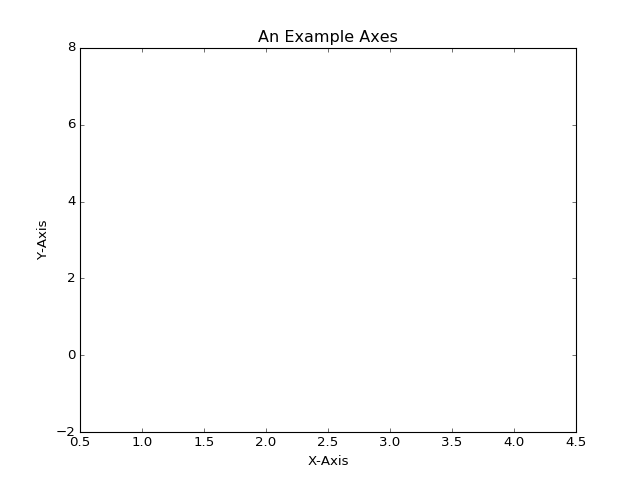

In [7]:
fig = plt.figure()

# 1row, 1column, 1position on the subplot grid
ax = fig.add_subplot(1, 1, 1)

ax.set_xlim([0.5, 4.5]) # x axis limits
ax.set_ylim([-2, 8])    # y axis limits
ax.set_title('An Example Axes')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')

_ = plt.show() # to keep things clean

Clearly this can get repitive quickly. Therefore, Matplotlib's set method can be very handy. It takes each kwarg you pass it and tries to call the corresponding "setter". For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

*Note that the set method doesn't just apply to **axes**; it applies to more-or-less all matplotlib objects.*

However, there are cases where you'll want to use things like **ax.set_xlabel('Some Label', size=25)** to control other options for a particular function.

## Basic Plotting

Most plotting happens on an **axes**. Therefore, if you're plotting something on an **axes**, then you'll use one of its methods.

We'll talk about different plotting methods in more depth later. For now, let's focus on two methods: **`plot`** and **`scatter`**.

`plot` draws points with lines connecting them.

`scatter` draws unconnected points, optionally scaled or colored by additional variables.

<IPython.core.display.Javascript object>


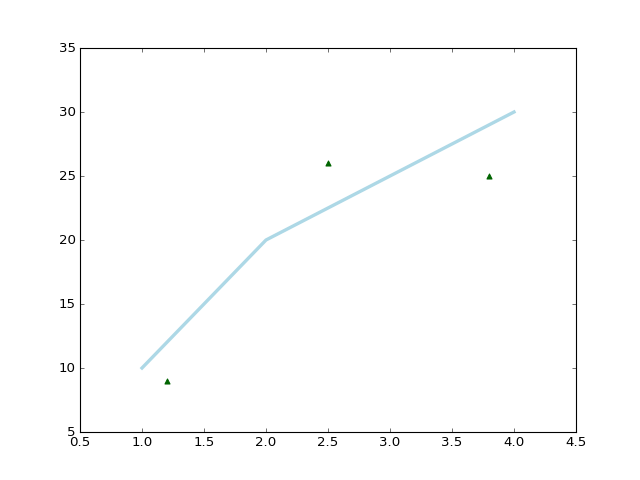

In [8]:
fig = plt.figure()

# we can use 111 without commas, it is the same as 1, 1, 1
ax = fig.add_subplot(111)

ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)

_ = plt.show()

## Axes methods vs. pyplot

Interestingly, just about all methods of an **axes** object exist as a function in the pyplot module (and vice-versa).

For example, when calling `plt.xlim(1, 10)`, pyplot calls `ax.set_xlim(1, 10)` on whichever **axes** is "current". Here is an equivalent version of the above example using just pyplot.

<IPython.core.display.Javascript object>


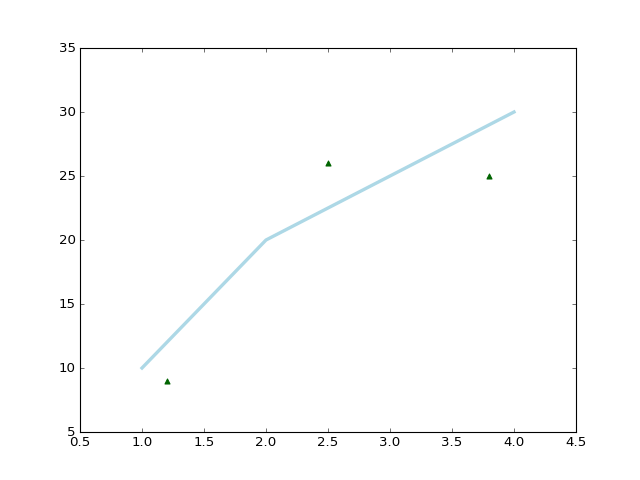

In [9]:
fig = plt.figure() # so it will create a new figure

plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

## "Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the **axes** and/or **figure** object to operate upon.

The advantage of keeping which **axes** we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

## Multiple Axes

We've mentioned before that a figure can have more than one **axes** on it. If you want your **axes** to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

<IPython.core.display.Javascript object>


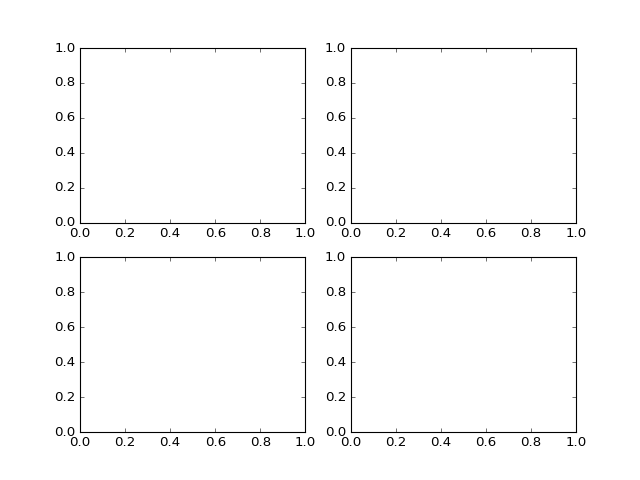

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)

`plt.subplots(...)` created a new figure and added 4 subplots to it. The **axes** object that was returned is a 2D numpy object array. Each item in the array is one of the subplots. They're laid out as you see them on the figure.

Therefore, when we want to work with one of these axes, we can index the axes array and use that item's methods.

<IPython.core.display.Javascript object>


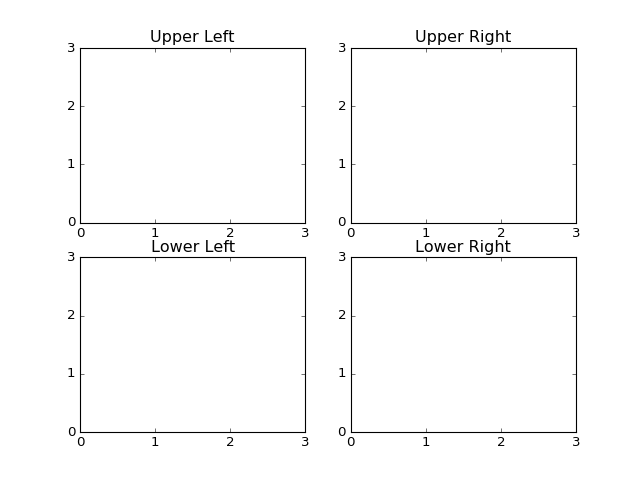

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[0, 1, 2, 3], yticks=[0, 1, 2, 3])

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot.

Any time you see something like

`fig = plt.figure()
ax = fig.add_subplot(111)`

You can replace it with:

`fig, ax = plt.subplots()`

We'll be using that approach for the rest of the examples. It's much cleaner.

However, keep in mind that we're still creating a figure and adding axes to it. If we start making plot layouts that can't be described by subplots, we'll have to go back to creating the figure first and then adding axes to it one-by-one.

## Quick Exercise: Exercise 1.1

Let's use some of what we've been talking about. Can you reproduce this figure?

![](images/exercise_1-1.png)

Here's the data and some code to get you started.

In [ ]:
# %load exercises/1.1-subplots_and_basic_plotting.py

import numpy as np
import matplotlib.pyplot as plt

# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?
